In [49]:
'''
Código basado en el que se puede encontrar en: 
https://ernestocrespo13.wordpress.com/2018/01/07/graficar-lineas-de-campo-electrico-con-matplotlib-y-python/
'''
import numpy as np

import matplotlib.pyplot as plt

from matplotlib.patches import Circle

from scipy import constants as const

In [50]:
# # Función que retorna el campo Eléctrico.

def E(q, r0, x, y):

    """Retorna el vector de campo eléctrico E=(Ex,Ey) de una carga q en r0"""
    K = 1 / (4*np.pi*const.epsilon_0) #Constante de Coulomb

    den = np.hypot(x-r0[0], y-r0[1])**3

    return K * q * (x - r0[0]) / den, K * q * (y - r0[1]) / den

In [51]:
# # puntos de los ejes x e y.

nx, ny = 64, 64

x = np.linspace(-2, 2, nx)

y = np.linspace(-2, 2, ny)

X, Y = np.meshgrid(x, y)

In [52]:
# # Crear un multipolo con nq cargas

# count = número de q. En ese caso es 1 dipolo

# ejecutar esta celda o la siguiente

count = 1

nq = 2**(count)

charges = []


for i in range(nq):

    q = i%2 * 2 - 1

    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

print(charges)

[(-1, (1.0, 0.0)), (1, (-1.0, 1.2246467991473532e-16))]


In [55]:
# Creanción manual de las cargas
# formato [(q1,(x1,y1)),(q2,(x2,y2)),...,(qi,(xi,yi),...,(qn,(xn,yn))]
# con qi el valor de carga i y (xi,xi) la posición de la carga i

charges = [(-1,(1,0)),(3,(1,1)),(1,(-1.5,0))]

In [56]:
# # Vector de campo eléctrico como componentes separados (Ex,Ey)

Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))

for charge in charges:

    ex, ey = E(*charge, x=X, y=Y)

    Ex += ex

    Ey += ey

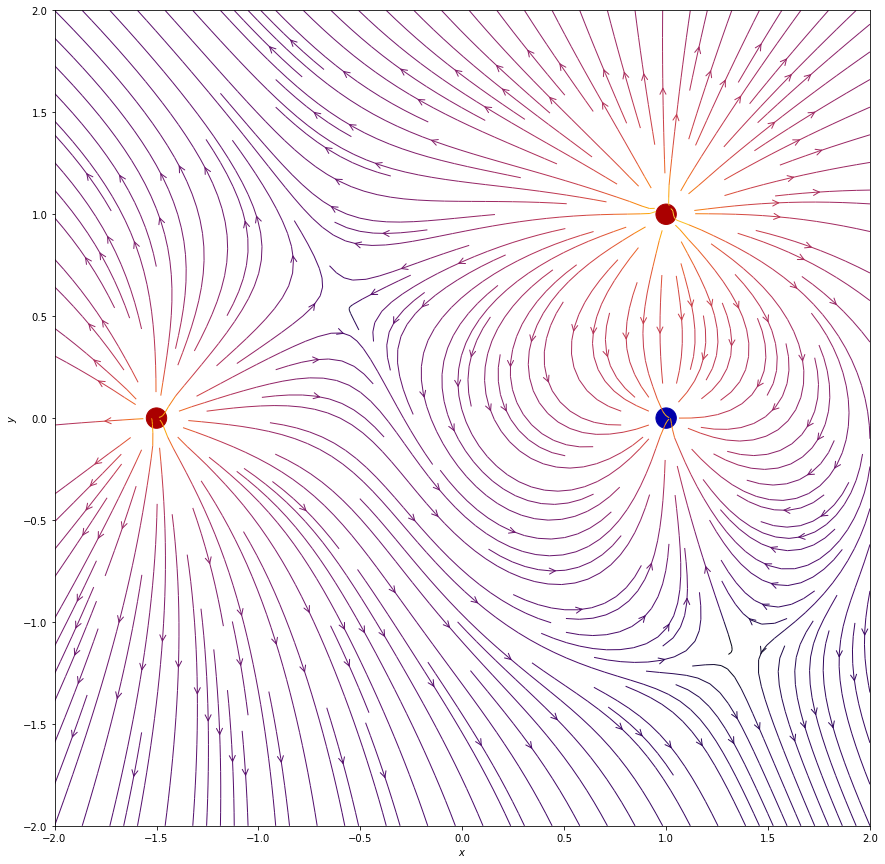

In [59]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111)

# # Dibujar las líneas de flujo con mapa de colores y estilos apropiados.

color = 2 * np.log(np.hypot(Ex, Ey))

ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,

              density=2, arrowstyle='->', arrowsize=1.5)

# # Agregar circulos para las cargas.

charge_colors = {True: '#aa0000', False: '#0000aa'}

for q, pos in charges:

    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

# # Graficar

ax.set_xlabel('$x$')

ax.set_ylabel('$y$')

ax.set_xlim(-2,2)

ax.set_ylim(-2,2)

ax.set_aspect('equal')

plt.savefig('campo_electrico.png')